In [1]:
from osgeo import gdal, gdalconst
from osgeo.gdalconst import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
img_path = './FinalQ4Image.jpg'

In [3]:
ds = gdal.Open(img_path, GA_ReadOnly)

In [4]:
n_band = ds.RasterCount

In [5]:
img_width = 2448
img_height = 2448

In [6]:
img = np.zeros((img_width,img_height,n_band))
for i in range(n_band):
    band = ds.GetRasterBand(i+1)
    data = band.ReadAsArray()
    img[:,:,i] = data
data = None
band = None

In [7]:
img.shape

(2448, 2448, 3)

In [8]:
pointWater = pd.read_csv('./water_samples.csv').values
pointUrban = pd.read_csv('./urban_samples.csv').values
pointAgri = pd.read_csv('./agriculture_samples.csv').values
pointRange = pd.read_csv('./Range_samples.csv').values
pointBarren = pd.read_csv('./barren_samples.csv').values

In [9]:
def imgPointToData(img,point):
    dataOut = []
    for i in range(len(point)):
        dataOut.append(img[point[i,0],point[i,1]])
    return np.array(dataOut)

In [10]:
dataWater = imgPointToData(img,pointWater)
dataUrban = imgPointToData(img,pointUrban)
dataAgri = imgPointToData(img,pointAgri)
dataRange = imgPointToData(img,pointRange)
dataBarren = imgPointToData(img,pointBarren)

In [11]:
X_train = np.concatenate((dataWater[:8000],dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train = np.ones((len(X_train)))
y_train[:8000] *= 0
y_train[8000:16000] *= 1
y_train[16000:24000] *= 2
y_train[24000:36000] *= 3
y_train[36000:40000] *= 4

X_test = np.concatenate((dataWater[8000:],dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test = np.ones((len(X_test)))
y_test[:2000] *= 0
y_test[2000:4000] *= 1
y_test[4000:6000] *= 2
y_test[6000:8000] *= 3
y_test[8000:10000] *= 4

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 3)
(40000,)
(10000, 3)
(10000,)


In [13]:
idx1 = np.random.permutation(len(X_train))
X_train = X_train[idx1]
y_train = y_train[idx1]

idx2 = np.random.permutation(len(X_test))
X_test = X_test[idx2]
y_test = y_test[idx2]

X_train = X_train/255
X_test = X_test/255

In [14]:
y_train[2002:]

array([3., 3., 3., ..., 1., 0., 0.])

In [15]:
import sklearn
import xgboost as xgb

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [17]:
xgbc = xgb.XGBClassifier(max_depth=21,n_estimators=500,learning_rate=0.05)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=21,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
print(classification_report(y_test,xgbc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      2000
         1.0       0.61      0.50      0.55      2000
         2.0       0.49      0.47      0.48      2000
         3.0       0.39      0.69      0.50      2000
         4.0       0.76      0.34      0.47      2000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.59     10000
weighted avg       0.64      0.59      0.59     10000



In [20]:
X_train2 = np.concatenate((dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train2 = np.ones((len(X_train2)))
y_train2[:8000] *= 0
y_train2[8000:16000] *= 1
y_train2[16000:24000] *= 2
y_train2[24000:36000] *= 3


X_test2 = np.concatenate((dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test2 = np.ones((len(X_test2)))
y_test2[:2000] *= 0
y_test2[2000:4000] *= 1
y_test2[4000:6000] *= 2
y_test2[6000:8000] *= 3


idx1 = np.random.permutation(len(X_train2))
X_train2 = X_train2[idx1]
y_train2 = y_train2[idx1]

idx2 = np.random.permutation(len(X_test2))
X_test2 = X_test2[idx2]
y_test2 = y_test2[idx2]

X_train2 = X_train2/255
X_test2 = X_test2/255

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(32000, 3)
(32000,)
(8000, 3)
(8000,)


In [21]:
xgbc2 = xgb.XGBClassifier(max_depth=15,n_estimators=200,learning_rate=0.1)
xgbc2.fit(X_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
print(classification_report(y_test2,xgbc2.predict(X_test2)))

              precision    recall  f1-score   support

         0.0       0.64      0.50      0.56      2000
         1.0       0.53      0.51      0.52      2000
         2.0       0.54      0.64      0.58      2000
         3.0       0.72      0.76      0.74      2000

    accuracy                           0.60      8000
   macro avg       0.61      0.60      0.60      8000
weighted avg       0.61      0.60      0.60      8000



In [30]:
def mymodel(data):
    l1 = xgbc.predict(data)
    l2 = xgbc2.predict(data)
    outdata = []
    for i in range(len(data)):
        if(l1[i]==0):
            outdata.append(0)
        else:
            outdata.append(l2[i]+1)
    return np.array(outdata)

In [31]:
pred = mymodel(X_test)

In [32]:
pred

array([2., 3., 4., ..., 1., 3., 0.])

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      2000
         1.0       0.64      0.50      0.56      2000
         2.0       0.51      0.48      0.50      2000
         3.0       0.53      0.64      0.58      2000
         4.0       0.72      0.76      0.74      2000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [34]:
img = img.reshape(((2448* 2448, 3)))
img = img/255

In [ ]:
predimg = mymodel(img)

In [ ]:
#predimg_dec = np.argmax(predimg,axis=1)
#predimg_dec =medfilt(predimg_dec,kernel_size=3)
predimg_dec = predimg

In [ ]:
colormap = np.zeros_like(img).astype(int)

In [ ]:
for i in range(len(colormap)):
    if(predimg_dec[i] == 0):
        #water
        colormap[i] = [0,0,255]
    elif(predimg_dec[i]==1):
        #urban
        colormap[i] = [0,255,255]
    elif (predimg_dec[i] ==2):
        #argi
        colormap[i] = [255,255,0]
    elif (predimg_dec[i] == 3):
        #range
        colormap[i] = [255,0,255]
    elif (predimg_dec[i] == 4):
        #barren
        colormap[i] = [255,255,255]

In [ ]:
predimg[0]

In [ ]:
colormap = colormap.reshape((2448,2448,3))

In [ ]:
plt.imshow(colormap)

([array([5158946.,   85798.,   60119.,   30307.,   30502.,   17502.,
           15675.,   13051.,   12778.,  568026.]),
  array([1203077., 2739956., 1013633.,  396885.,  194907.,  139780.,
           93787.,   66633.,   41589.,  102457.]),
  array([1221419., 1117671., 1396672.,  856394.,  452014.,  373052.,
          228038.,  168081.,  132367.,   46996.]),
  array([1279255.,  581028.,  644786., 1033556., 1112818.,  721364.,
          568673.,   51224.,       0.,       0.]),
  array([4.589292e+06, 7.475250e+05, 2.749180e+05, 2.328310e+05,
         1.406310e+05, 7.412000e+03, 8.800000e+01, 7.000000e+00,
         0.000000e+00, 0.000000e+00])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 5 Lists of Patches objects>)

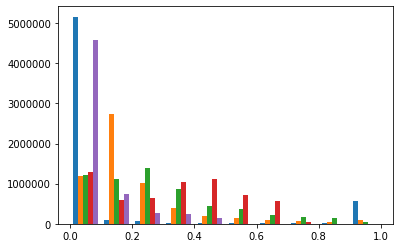

In [235]:
plt.hist(predimg)

In [232]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score

In [235]:
confmat = confusion_matrix(y_test,pred)
confmat

array([[1881,    0,  108,   11,    0],
       [  11,  834,  339,  744,   72],
       [  26,   52,  947,  968,    7],
       [  11,   81,  229, 1669,   10],
       [   0,  113,   88,  966,  833]])

In [249]:
user_acc = [confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]]/np.sum(confmat,axis=1)*100
user_acc

array([94.05, 41.7 , 47.35, 83.45, 41.65])

In [252]:
prod_acc = [confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]]/np.sum(confmat,axis=0)*100
prod_acc

array([97.51166407, 77.22222222, 55.34774985, 38.29738412, 90.34707158])

In [261]:
overall_acc = np.sum([confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]])/10000
overall_acc

0.6164

In [263]:
(overall_acc-1/5)/(1-1/5)

0.5204999999999999

In [233]:
cohen_kappa_score(y_test,pred)

0.5205

In [254]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      2000
         1.0       0.77      0.42      0.54      2000
         2.0       0.55      0.47      0.51      2000
         3.0       0.38      0.83      0.53      2000
         4.0       0.90      0.42      0.57      2000

    accuracy                           0.62     10000
   macro avg       0.72      0.62      0.62     10000
weighted avg       0.72      0.62      0.62     10000



In [243]:
confmat[0]

array([1881,    0,  108,   11,    0])

In [251]:
np.sum(confmat,axis=0)

array([1929, 1080, 1711, 4358,  922])